In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, SplineTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [219]:
df = pd.read_csv("../files/BRISTOR_Zegoland_all_%.csv")

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [220]:
X=df.iloc[:,8:13]
y=df.iloc[:,4:5]

data=pd.concat([y,X],axis=1)

data.head()

,Value,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
Date,,,,,,
2021-11-01,56305.84,0.013829,0.05,0.001,0.01,0.000
2021-12-01,35581.00,0.013842,0.06,0.021,0.01,0.001
2022-01-01,41136.88,0.013942,0.05,0.026,0.01,0.002
2022-02-01,41689.80,0.014830,0.04,0.041,0.02,0.004
2022-03-01,54587.28,0.016513,0.05,0.028,0.02,0.005


In [221]:
# List of columns to create lags for
columns_to_lag = ['Value', 'DemandShareA']

num_lags=2
# Loop through each column and lag
for col in columns_to_lag:
    for lag in range(1, num_lags + 1):
        data[f'{col}_Lag{lag}'] = data[col].shift(lag)

In [222]:
data.head()

,Value,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB,Value_Lag1,Value_Lag2,DemandShareA_Lag1,DemandShareA_Lag2
Date,,,,,,,,,,
2021-11-01,56305.84,0.013829,0.05,0.001,0.01,0.000,NaN,NaN,NaN,NaN
2021-12-01,35581.00,0.013842,0.06,0.021,0.01,0.001,56305.84,NaN,0.013829,NaN
2022-01-01,41136.88,0.013942,0.05,0.026,0.01,0.002,35581.00,56305.84,0.013842,0.013829
2022-02-01,41689.80,0.014830,0.04,0.041,0.02,0.004,41136.88,35581.00,0.013942,0.013842
2022-03-01,54587.28,0.016513,0.05,0.028,0.02,0.005,41689.80,41136.88,0.014830,0.013942


In [223]:
data['Value_Lag1'] = data['Value_Lag1'].fillna(data['Value_Lag1'].mean())

data['Value_Lag2'] = data['Value_Lag2'].fillna(data['Value_Lag2'].mean())

data['DemandShareA_Lag1'] = data['DemandShareA_Lag1'].fillna(data['DemandShareA_Lag1'].mean())

data['DemandShareA_Lag2'] = data['DemandShareA_Lag2'].fillna(data['DemandShareA_Lag2'].mean())

In [224]:
X=df.iloc[:,8:9]
y=df.iloc[:,4:5]

data=pd.concat([y,X],axis=1)

data.head()

,Value,DemandShareA
Date,,
2021-11-01,56305.84,0.013829
2021-12-01,35581.00,0.013842
2022-01-01,41136.88,0.013942
2022-02-01,41689.80,0.014830
2022-03-01,54587.28,0.016513


In [225]:
def split_dataset(data):
    #split into standard weeks
    train, test = data[1:-5], data[-5:-1]
    

    return train, test

In [226]:
train_data, test_data = split_dataset(data)

In [227]:
y_train,X_train  = train_data.iloc[:,0:1], train_data.iloc[:,1:10]

y_test,X_test  = test_data.iloc[:,0:1], test_data.iloc[:,1:10]

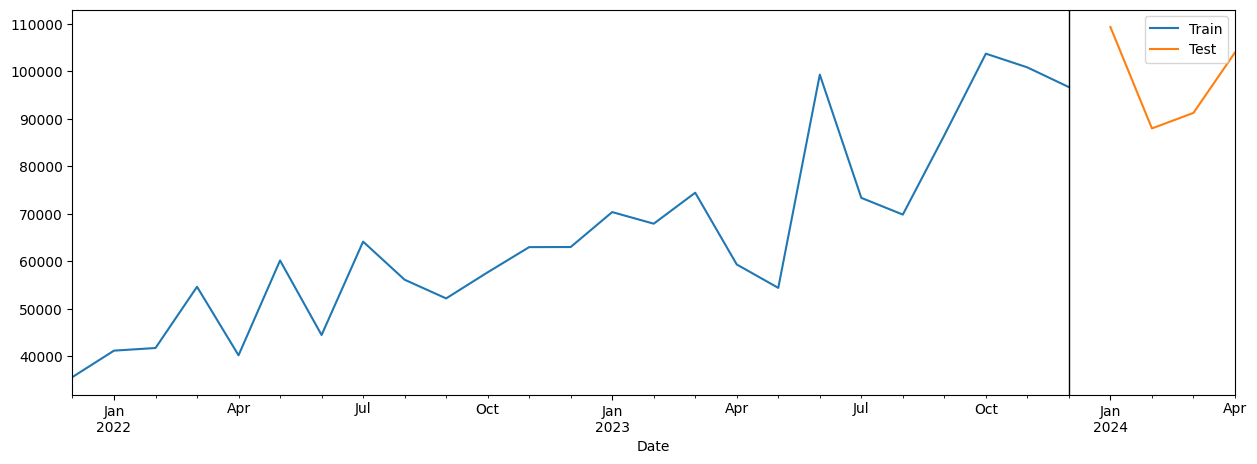

In [228]:
fig,ax= plt.subplots(figsize=(15,5))
y_train.plot(ax=ax, label='Train')
y_test.plot(ax=ax, label='Train')

ax.axvline(x=y_train.index[-1], color='black', linewidth=1)
ax.legend(['Train', 'Test'])    
plt.show()

In [247]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

reg= xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50, learning_rate=0.004)
reg.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)],  verbose=50)

[0]	validation_0-rmse:19158.87103	validation_1-rmse:33952.26107
[50]	validation_0-rmse:16437.78499	validation_1-rmse:29217.30282
[100]	validation_0-rmse:14153.61058	validation_1-rmse:25269.19144
[150]	validation_0-rmse:12237.20874	validation_1-rmse:21845.39741
[200]	validation_0-rmse:10612.02387	validation_1-rmse:18960.68991
[250]	validation_0-rmse:9235.59858	validation_1-rmse:16584.31930
[300]	validation_0-rmse:8066.94085	validation_1-rmse:14654.48846
[350]	validation_0-rmse:7068.75275	validation_1-rmse:13113.79900
[400]	validation_0-rmse:6221.85056	validation_1-rmse:11903.27274
[450]	validation_0-rmse:5506.41866	validation_1-rmse:10975.50309
[500]	validation_0-rmse:4900.81980	validation_1-rmse:10265.94992
[550]	validation_0-rmse:4358.43594	validation_1-rmse:9719.05649
[600]	validation_0-rmse:3881.70224	validation_1-rmse:9338.27117
[650]	validation_0-rmse:3471.27269	validation_1-rmse:9087.59168
[700]	validation_0-rmse:3112.43854	validation_1-rmse:8931.98455
[750]	validation_0-rmse:279

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.004, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [230]:
X_train.head()

,DemandShareA
Date,
2021-12-01,0.013842
2022-01-01,0.013942
2022-02-01,0.014830
2022-03-01,0.016513
2022-04-01,0.017154


In [231]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Initialize XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 8401.184687500005


In [232]:
import numpy as np
import pandas as pd

# Start with the last known features from the training or validation set (December 2024)
last_features = X_train.iloc[-1, :].values  # Use features for December 2024
forecast_horizon = 36  # Number of months to forecast (2025–2027)
forecast = []  # To store predictions

# Recursive forecasting for 2025–2027
for i in range(forecast_horizon):
    # Predict the next value
    next_prediction = model.predict(last_features.reshape(1, -1))[0]
    forecast.append(next_prediction)
    
    # Update features: Shift lags and insert the new prediction
    last_features = np.roll(last_features, -1)  # Shift all features to the left
    last_features[-1] = next_prediction  # Add the predicted value as the newest lag

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start='2023-12-01', periods=forecast_horizon, freq='MS')
forecast_df = pd.DataFrame({
    'ds': forecast_dates,
    'yhat': forecast
})

# Display the forecast
print(forecast_df)


           ds          yhat
0  2023-12-01  96628.945312
1  2024-01-01  99258.320312
2  2024-02-01  99258.320312
3  2024-03-01  99258.320312
4  2024-04-01  99258.320312
5  2024-05-01  99258.320312
6  2024-06-01  99258.320312
7  2024-07-01  99258.320312
8  2024-08-01  99258.320312
9  2024-09-01  99258.320312
10 2024-10-01  99258.320312
11 2024-11-01  99258.320312
12 2024-12-01  99258.320312
13 2025-01-01  99258.320312
14 2025-02-01  99258.320312
15 2025-03-01  99258.320312
16 2025-04-01  99258.320312
17 2025-05-01  99258.320312
18 2025-06-01  99258.320312
19 2025-07-01  99258.320312
20 2025-08-01  99258.320312
21 2025-09-01  99258.320312
22 2025-10-01  99258.320312
23 2025-11-01  99258.320312
24 2025-12-01  99258.320312
25 2026-01-01  99258.320312
26 2026-02-01  99258.320312
27 2026-03-01  99258.320312
28 2026-04-01  99258.320312
29 2026-05-01  99258.320312
30 2026-06-01  99258.320312
31 2026-07-01  99258.320312
32 2026-08-01  99258.320312
33 2026-09-01  99258.320312
34 2026-10-01  99258

In [233]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)
# Make predictions on the test set
y_pred_train = model.predict(X_train)

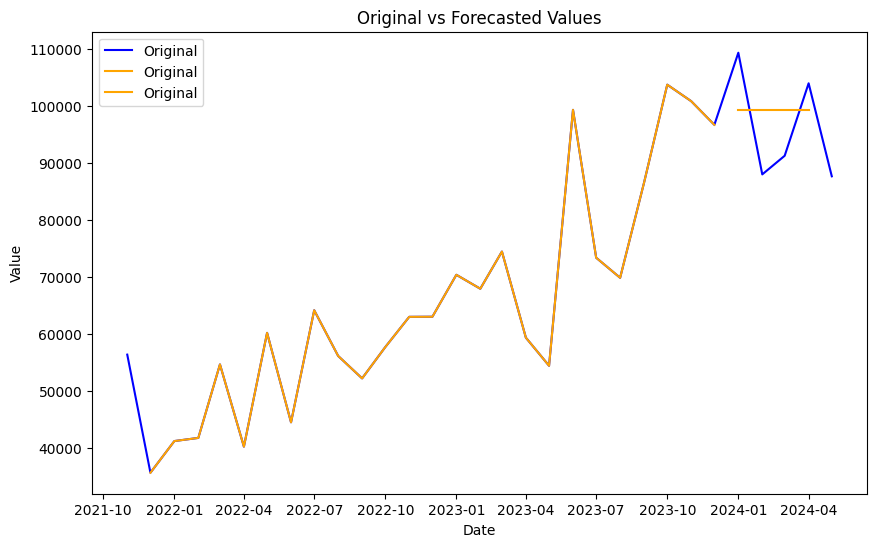

In [234]:
import matplotlib.pyplot as plt


forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])

# Ensure the data aligns properly
plt.figure(figsize=(10, 6))

# Plot the original values (test set)
plt.plot(data.index, data['Value'], label='Original', color='blue')
plt.plot(y_train.index, y_pred_train, label='Original', color='orange')
plt.plot(y_test.index, y_pred_test, label='Original', color='orange')
# Plot the forecasted values
#plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original vs Forecasted Values')
plt.legend()

# Show the plot
plt.show()